In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing pada dataset Emas

In [2]:
df_saham = pd.read_csv("../dataset/saham_data_1h.csv")

# Cek ringkasan dataset
print(df_saham.info())
print(df_saham.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19554 entries, 0 to 19553
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  19554 non-null  object 
 1   Open      19554 non-null  float64
 2   High      19554 non-null  float64
 3   Low       19554 non-null  float64
 4   Close     19554 non-null  float64
 5   Volume    19554 non-null  int64  
 6   Return    19554 non-null  float64
 7   Ticker    19554 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 1.2+ MB
None
               Open          High           Low         Close        Volume  \
count  19554.000000  19554.000000  19554.000000  19554.000000  1.955400e+04   
mean    2252.828240   2259.238972   2245.962461   2252.593007  6.234286e+06   
std     3370.666490   3379.189289   3361.558913   3370.452720  1.060362e+07   
min      104.135002    104.910004    103.709999    104.132103  0.000000e+00   
25%      193.145004    193.792496    192

In [3]:
# 1. Hapus baris pertama jika mengandung header tambahan
df_saham = df_saham.iloc[2:].reset_index(drop=True)

# 2. Hapus kolom duplikat atau yang tidak relevan
drop_columns = ['Close.1', 'High.1', 'Low.1', 'Open.1', 'Volume.1', 
                'Close.2', 'High.2', 'Low.2', 'Open.2', 'Volume.2']
df_saham.drop(columns=drop_columns, errors='ignore', inplace=True)

# 3. Hapus baris dengan banyak NaN (jika jumlah NaN > 50% dari total kolom)
df_saham.dropna(thresh=len(df_saham.columns) // 2, inplace=True)

# 4. Konversi tipe data ke float (kecuali kolom 'Ticker' dan 'Date')
numeric_cols = ['Close', 'High', 'Low', 'Open', 'Volume', 'Return']
for col in numeric_cols:
    df_saham[col] = pd.to_numeric(df_saham[col], errors='coerce')


In [4]:
df_saham.isnull().sum()

Datetime    0
Open        0
High        0
Low         0
Close       0
Volume      0
Return      0
Ticker      0
dtype: int64

In [5]:
print(df_saham.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
19547    False
19548    False
19549    False
19550    False
19551    False
Length: 19552, dtype: bool


In [6]:
# Cek hasil akhir
print(df_saham.info())
print(df_saham.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19552 entries, 0 to 19551
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  19552 non-null  object 
 1   Open      19552 non-null  float64
 2   High      19552 non-null  float64
 3   Low       19552 non-null  float64
 4   Close     19552 non-null  float64
 5   Volume    19552 non-null  int64  
 6   Return    19552 non-null  float64
 7   Ticker    19552 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 1.2+ MB
None
                    Datetime        Open        High         Low       Close  \
0  2023-05-01 16:30:00+00:00  169.985001  170.449997  169.985001  170.139999   
1  2023-05-01 17:30:00+00:00  170.130005  170.410004  169.820007  169.919907   
2  2023-05-01 18:30:00+00:00  169.899994  169.960007  169.199997  169.690994   
3  2023-05-01 19:30:00+00:00  169.699997  169.899994  169.250000  169.559998   
4  2023-05-02 13:30:00+00:00  170.0

In [7]:
df_saham.to_csv('../dataset/saham_data_cleaned_1h.csv')

In [8]:
df_saham =pd.read_csv("../dataset/saham_data_cleaned_1h.csv")

In [9]:
def visualize_data(df, title):
    # Pastikan DataFrame diurutkan berdasarkan tanggal
    df = df.sort_values(by='Datetime')

    # Line Chart: Tren Harga
    plt.figure(figsize=(12, 6))
    plt.plot(df['Datetime'], df['Close'], label='Close Price', color='blue')
    plt.xlabel('Datetime')
    plt.ylabel('Close Price')
    plt.title(f'Tren Harga {title} Seiring Waktu')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Box Plot: Distribusi Harga
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df[['Close', 'High', 'Low', 'Open']])
    plt.title(f'Distribusi Harga {title}')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

    # Histogram: Distribusi Return
    plt.figure(figsize=(10, 5))
    sns.histplot(df['Return'], bins=50, kde=True, color='green')
    plt.title(f'Distribusi Return {title}')
    plt.xlabel('Return')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


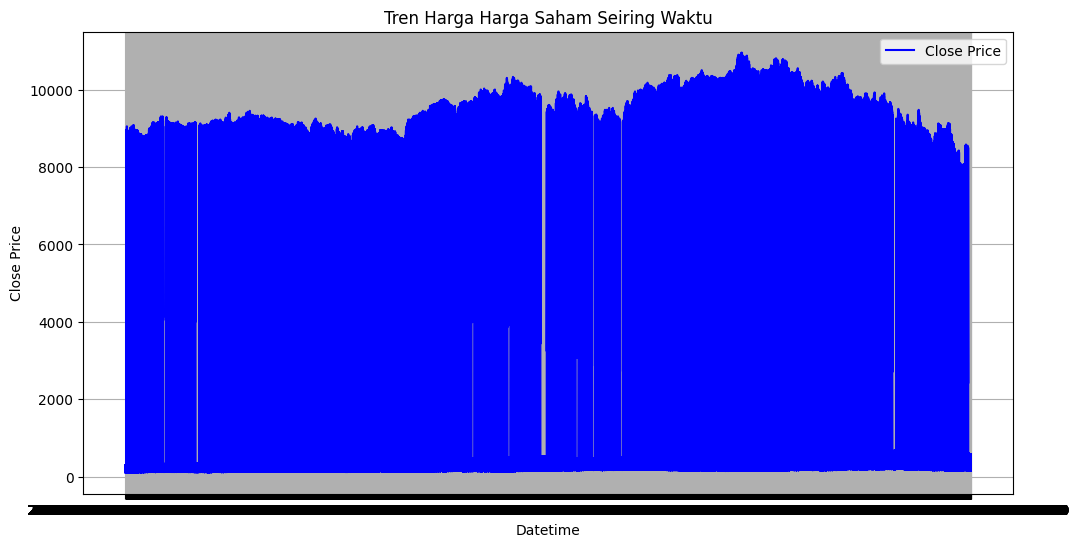

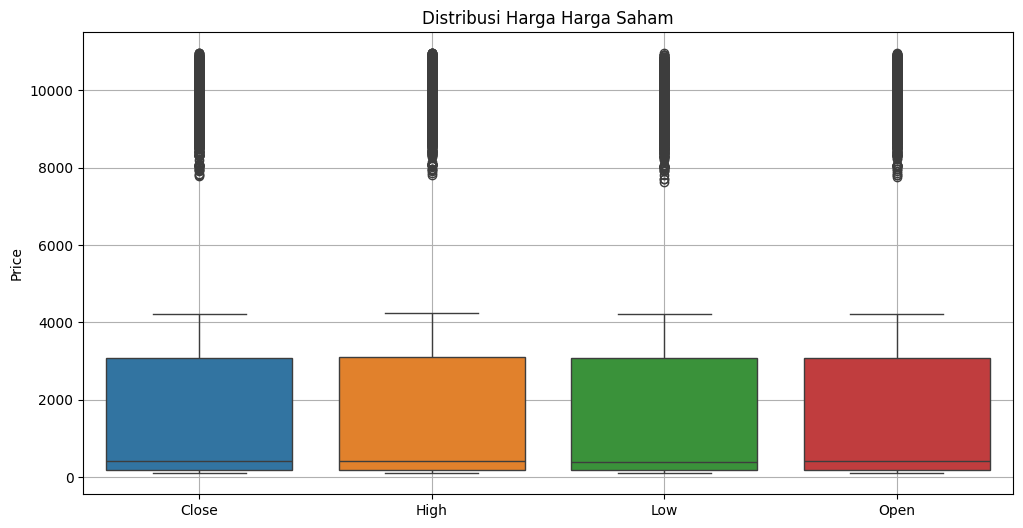

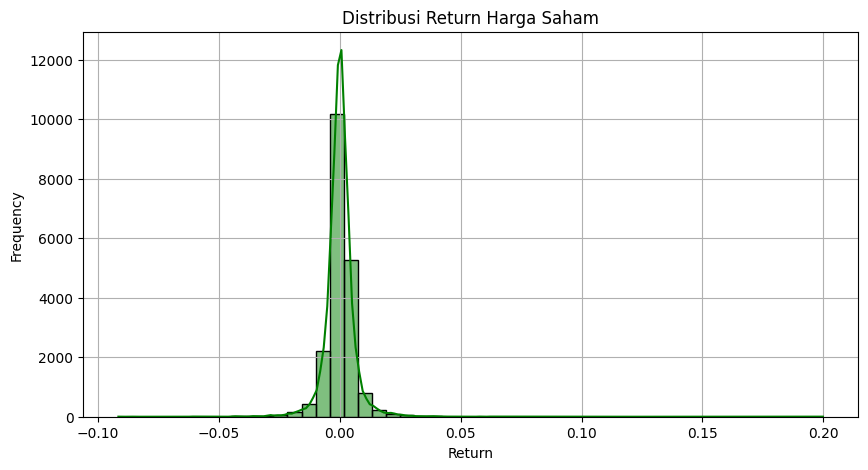

In [10]:
visualize_data(df_saham, title="Harga Saham")  # Untuk data per jam

In [11]:
df_saham = pd.read_csv("../dataset/saham_data_cleaned_1h.csv")

# Cek ringkasan dataset
print(df_saham.info())
print(df_saham.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19552 entries, 0 to 19551
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  19552 non-null  int64  
 1   Datetime    19552 non-null  object 
 2   Open        19552 non-null  float64
 3   High        19552 non-null  float64
 4   Low         19552 non-null  float64
 5   Close       19552 non-null  float64
 6   Volume      19552 non-null  int64  
 7   Return      19552 non-null  float64
 8   Ticker      19552 non-null  object 
dtypes: float64(5), int64(2), object(2)
memory usage: 1.3+ MB
None
         Unnamed: 0          Open          High           Low         Close  \
count  19552.000000  19552.000000  19552.000000  19552.000000  19552.000000   
mean    9775.500000   2253.041389   2259.452682   2246.174932   2252.806084   
std     5644.320567   3370.772999   3379.296052   3361.665196   3370.559258   
min        0.000000    104.135002    104.910004    103.709